In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&units=imperial"

# make cities a dataframe
cities_df = pd.DataFrame(cities)

cities_df = cities_df.rename(columns={0: "City"})
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Humidity"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"] = ""

for index, row in cities_df.iterrows():
    
    city = row["City"]
    
    city_url = url + "&q=" + city
    
    print(f"Retrieving Results for Index {index}: {city}.")
    
    weather= requests.get(city_url).json()
        
    try:
        cities_df.loc[index, "Cloudiness"] = weather["clouds"]["all"]
        cities_df.loc[index, "Country"] = weather["sys"]["country"]
        cities_df.loc[index, "Date"] = weather["dt"]
        cities_df.loc[index, "Lat"] = weather["coord"]["lat"]
        cities_df.loc[index, "Lng"] = weather["coord"]["lon"]
        cities_df.loc[index, "Humidity"] = weather["main"]["humidity"]
        cities_df.loc[index, "Max Temp"] = weather["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"] = weather["wind"]["speed"]
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")
    


Retrieving Results for Index 0: punta arenas.
------------
Retrieving Results for Index 1: barrow.
------------
Retrieving Results for Index 2: saint-pierre.
------------
Retrieving Results for Index 3: narsaq.
------------
Retrieving Results for Index 4: san patricio.
------------
Retrieving Results for Index 5: haicheng.
------------
Retrieving Results for Index 6: yumen.
------------
Retrieving Results for Index 7: hermanus.
------------
Retrieving Results for Index 8: binga.
------------
Retrieving Results for Index 9: narrabri.
------------
Retrieving Results for Index 10: saint-francois.
------------
Retrieving Results for Index 11: port alfred.
------------
Retrieving Results for Index 12: pontes e lacerda.
------------
Retrieving Results for Index 13: maarianhamina.
Missing field/result... skipping.
------------
Retrieving Results for Index 14: warqla.
Missing field/result... skipping.
------------
Retrieving Results for Index 15: jamestown.
------------
Retrieving Results for 

------------
Retrieving Results for Index 136: arraial do cabo.
------------
Retrieving Results for Index 137: ponta do sol.
------------
Retrieving Results for Index 138: lumberton.
------------
Retrieving Results for Index 139: rawson.
------------
Retrieving Results for Index 140: kruisfontein.
------------
Retrieving Results for Index 141: airai.
------------
Retrieving Results for Index 142: san quintin.
------------
Retrieving Results for Index 143: havoysund.
------------
Retrieving Results for Index 144: pangnirtung.
------------
Retrieving Results for Index 145: nizhneyansk.
Missing field/result... skipping.
------------
Retrieving Results for Index 146: tommot.
------------
Retrieving Results for Index 147: chagda.
Missing field/result... skipping.
------------
Retrieving Results for Index 148: russell.
------------
Retrieving Results for Index 149: salalah.
------------
Retrieving Results for Index 150: tabuk.
------------
Retrieving Results for Index 151: kinablangan.
-----

------------
Retrieving Results for Index 272: kaitangata.
------------
Retrieving Results for Index 273: soyo.
------------
Retrieving Results for Index 274: bethel.
------------
Retrieving Results for Index 275: avarua.
------------
Retrieving Results for Index 276: cochrane.
------------
Retrieving Results for Index 277: bontang.
------------
Retrieving Results for Index 278: kurilsk.
------------
Retrieving Results for Index 279: rungata.
Missing field/result... skipping.
------------
Retrieving Results for Index 280: ulaangom.
------------
Retrieving Results for Index 281: dunedin.
------------
Retrieving Results for Index 282: flinders.
------------
Retrieving Results for Index 283: mankono.
------------
Retrieving Results for Index 284: ojinaga.
------------
Retrieving Results for Index 285: tekeli.
------------
Retrieving Results for Index 286: thanh hoa.
------------
Retrieving Results for Index 287: rio cuarto.
------------
Retrieving Results for Index 288: hadejia.
---------

------------
Retrieving Results for Index 408: puerto madryn.
------------
Retrieving Results for Index 409: cairns.
------------
Retrieving Results for Index 410: malwan.
Missing field/result... skipping.
------------
Retrieving Results for Index 411: bathsheba.
------------
Retrieving Results for Index 412: wamba.
------------
Retrieving Results for Index 413: lakes entrance.
------------
Retrieving Results for Index 414: gorno-chuyskiy.
Missing field/result... skipping.
------------
Retrieving Results for Index 415: the valley.
------------
Retrieving Results for Index 416: lokosovo.
------------
Retrieving Results for Index 417: fenyi.
------------
Retrieving Results for Index 418: tessalit.
------------
Retrieving Results for Index 419: savannah bight.
------------
Retrieving Results for Index 420: panguna.
------------
Retrieving Results for Index 421: manbij.
------------
Retrieving Results for Index 422: cap malheureux.
------------
Retrieving Results for Index 423: hovd.
-----

------------
Retrieving Results for Index 544: grand river south east.
Missing field/result... skipping.
------------
Retrieving Results for Index 545: salta.
------------
Retrieving Results for Index 546: glendive.
------------
Retrieving Results for Index 547: mount pleasant.
------------
Retrieving Results for Index 548: izhma.
------------
Retrieving Results for Index 549: oistins.
------------
Retrieving Results for Index 550: manicore.
------------
Retrieving Results for Index 551: ajdabiya.
------------
Retrieving Results for Index 552: azimur.
Missing field/result... skipping.
------------
Retrieving Results for Index 553: tuam.
------------
Retrieving Results for Index 554: paro.
------------
Retrieving Results for Index 555: tshikapa.
------------
Retrieving Results for Index 556: karratha.
------------
Retrieving Results for Index 557: manadhoo.
------------
Retrieving Results for Index 558: penzance.
------------
Retrieving Results for Index 559: falealupo.
Missing field/re

In [6]:
# replace all the empty cells with nan value
cities_df["Cloudiness"].replace("", np.nan, inplace=True)

# drop the row that the city is not found in open weather map
cities_df = cities_df.dropna(how="any")


,City,Cloudiness,Country,Date,Lat,Lng,Humidity,Max Temp,Wind Speed
0,punta arenas,40.0,CL,1535619600,-53.16,-70.91,74,37.4,20.8
1,barrow,76.0,AR,1535621823,-38.31,-60.23,80,45.47,12.01
2,saint-pierre,75.0,FR,1535619600,48.95,4.24,77,62.6,9.17
3,narsaq,90.0,GL,1535619000,60.91,-46.05,93,41,8.05
4,san patricio,0.0,PY,1535621911,-26.98,-56.83,41,79.94,7.76
5,haicheng,80.0,CN,1535622086,40.85,122.74,85,70.67,2.73
6,yumen,20.0,CN,1535622087,40.29,97.04,77,67.79,4.74
7,hermanus,24.0,ZA,1535622087,-34.42,19.24,74,58.25,4.41
8,binga,0.0,ZW,1535622087,-17.62,27.34,57,75.71,8.1
9,narrabri,36.0,AU,1535622088,-30.33,149.78,56,51.59,3.51


In [10]:
# save as csv
cities_df.to_csv(output_data_file, encoding='utf-8', index=False)


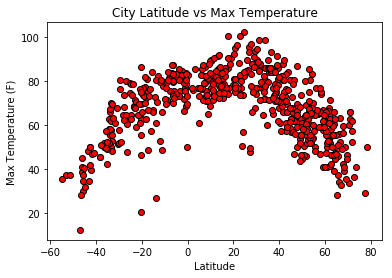

<Figure size 432x288 with 0 Axes>

In [13]:
# graph
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o", facecolors="red", edgecolors="black")

plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.show()

plt.savefig("City Latitude vs Max Temperature.png")

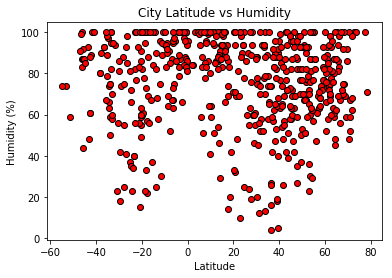

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o", facecolors="red", edgecolors="black")

plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show()

plt.savefig("City Latitude vs Humidity.png")

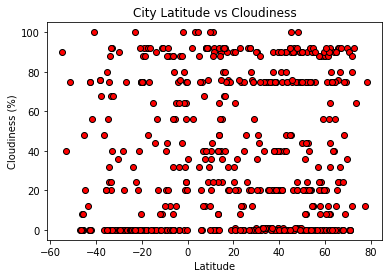

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black")

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()

plt.savefig("City Latitude vs Cloudiness.png")

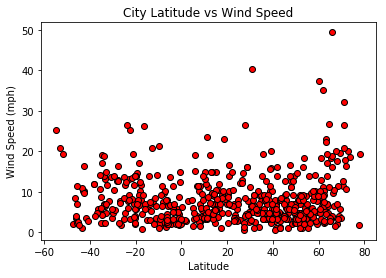

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black")

plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show()

plt.savefig("City Latitude vs Wind Speed.png")

The closer the city latitude to 0, the higher the max temperature
Latitude and cloudiness have no relation
Latitude and humidity have no relation